# Bevezetés az adattudományba 1.

## 2. notebook (adatok beolvasása, kezelése, osztályozás, kiértékelés)

### Adatszerzés különböző módjai

* Közvetlenül letöltünk egy (kész) adatfájlt
* Lekérdezünk adatot egy adatbázisból (lásd Adatbáziskezelés)
* Lekérdezünk egy (webes) API-t
* Kinyerünk adatokat egy weblapról

#### API
* Alkalmazásprogramozási felület vagy alkalmazásprogramozási interfész (angolul Application Programming Interface)
* Egy nyilvános API segítségével lehetséges egy programrendszer szolgáltatásait használni anélkül, hogy annak belső működését ismerni kellene
* Általában nem kötődik programozási nyelvhez, bármilyen programnyevből meghívható
* Alkalmazásba lehet integrálni API segítségével (pl. Google Maps)
* Adatokhoz férhetünk hozzá API segítségével
* Vannak ingyenes / fizetős API-k
* Van hogy regisztrálni kell az API használatához (kulcs igénylése) vannak szabadon elérhető API-k
* Sok minden az API-król, legnépszeűbb API-k listája: https://www.programmableweb.com/apis

#### Leggyakrabban használt adatformátumok
* CSV (comma sperated values)
* JSON (JavaScript Object Notation):
    * A JavaScript szkriptnyelvből alakult ki egyszerű adatstruktúrák reprezentálására
    * Mára nyelvvfüggetlen
    * A legtöbb webes API JSON formátumban adja meg az adatokat
* XML / HTML
    * hierarchikus struktúra (tagek)

##### Példa - egy személy lehetséges JSON reprezentációja

In [1]:
jsonex = {
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": True,
  "age": 25,
  "address": {
    "streetAddress": "21 2nd Street",
    "city": "New York",
    "state": "NY",
    "postalCode": "10021-3100"
  },
  "phoneNumbers": [
    {
      "type": "home",
      "number": "212 555-1234"
    },
    {
      "type": "office",
      "number": "646 555-4567"
    },
    {
      "type": "mobile",
      "number": "123 456-7890"
    }
  ],
  "children": [],
  "spouse": None
}

In [2]:
type(jsonex)

dict

### JSON fájlok beolvasása, kezelése

In [2]:
import json
a = {'a': 1, 'b':2}
s = json.dumps(a)
a2 = json.loads(s)

In [4]:
a

{'a': 1, 'b': 2}

In [5]:
s

'{"a": 1, "b": 2}'

In [6]:
a2

{'a': 1, 'b': 2}

#### 2016-os foci eb magyar keretének beolvasása

In [3]:
from urllib.request import urlopen
url = 'https://math.bme.hu/~molontay/hungary-players.json'
data = urlopen(url).read().decode('utf-8')

In [8]:
data

'{"sheets": {"Players": [{"": "", "date of birth": "01/04/1976", "photo done?": "yes", "goals for country": "0", "name": "G\\u00e1bor Kir\\u00e1ly", "league": "National Championship (Hungary)", "rating_match3": "", "position": "Goalkeeper", "rating_match1": "", "club": "Halad\\u00e1s", "special player? (eg. key player, promising talent, etc)": "No1 goalkeeper", "number": "", "caps": "102", "bio": "40 years old and still going strong in his trademark tracksuit bottoms. He has fond memories of group opponents Austria where his first touch in the national team \\u2013 a few goal kicks aside \\u2013 was saving a penalty against them in 1998. Played 104 games for Crystal Palace from 2004, and also had spells at West Ham, Villa, Burnley and Fulham. Returned to Hungary with Halad\\u00e1s last year. He won his 100th Hungary cap in a 1-0 win away to Norway in their 2016 qualifying play-off first-leg.", "rating_match2": ""}, {"": "", "date of birth": "16/11/1990", "photo done?": "yes", "goals fo

In [4]:
eb = json.loads(data)

In [5]:
eb

{'sheets': {'Players': [{'': '',
    'date of birth': '01/04/1976',
    'photo done?': 'yes',
    'goals for country': '0',
    'name': 'Gábor Király',
    'league': 'National Championship (Hungary)',
    'rating_match3': '',
    'position': 'Goalkeeper',
    'rating_match1': '',
    'club': 'Haladás',
    'special player? (eg. key player, promising talent, etc)': 'No1 goalkeeper',
    'number': '',
    'caps': '102',
    'bio': '40 years old and still going strong in his trademark tracksuit bottoms. He has fond memories of group opponents Austria where his first touch in the national team – a few goal kicks aside – was saving a penalty against them in 1998. Played 104 games for Crystal Palace from 2004, and also had spells at West Ham, Villa, Burnley and Fulham. Returned to Hungary with Haladás last year. He won his 100th Hungary cap in a 1-0 win away to Norway in their 2016 qualifying play-off first-leg.',
    'rating_match2': ''},
   {'': '',
    'date of birth': '16/11/1990',
    '

##### Lényeges adatok kigyűjtése

Dictionaryből a lényeges adatok kiolvasása

In [10]:
dict = eb['sheets']['Players']
keys = ['name', 'caps', 'goals for country', 'date of birth', 'club']
dict

[{'': '',
  'date of birth': '01/04/1976',
  'photo done?': 'yes',
  'goals for country': '0',
  'name': 'Gábor Király',
  'league': 'National Championship (Hungary)',
  'rating_match3': '',
  'position': 'Goalkeeper',
  'rating_match1': '',
  'club': 'Haladás',
  'special player? (eg. key player, promising talent, etc)': 'No1 goalkeeper',
  'number': '',
  'caps': '102',
  'bio': '40 years old and still going strong in his trademark tracksuit bottoms. He has fond memories of group opponents Austria where his first touch in the national team – a few goal kicks aside – was saving a penalty against them in 1998. Played 104 games for Crystal Palace from 2004, and also had spells at West Ham, Villa, Burnley and Fulham. Returned to Hungary with Haladás last year. He won his 100th Hungary cap in a 1-0 win away to Norway in their 2016 qualifying play-off first-leg.',
  'rating_match2': ''},
 {'': '',
  'date of birth': '16/11/1990',
  'photo done?': 'yes',
  'goals for country': '0',
  'name'

In [12]:
players = [[player[i] for i in keys] for player in dict] 
players

[['Gábor Király', '102', '0', '01/04/1976', 'Haladás'],
 ['Dénes Dibusz', '4', '0', '16/11/1990', 'Ferencváros'],
 ['Péter Gulácsi', '3', '0', '06/05/1990', 'Red Bull Leipzig'],
 ['Barnabás Bese', '0', '0', '06/05/1994', 'MTK'],
 ['Attila Fiola', '14', '0', '17/02/1990', 'Puskás Academy'],
 ['Richárd Guzmics', '13', '1', '16/04/1987', 'Wisla Krakow'],
 ['Tamás Kádár', '29', '0', '14/03/1990', 'Lech Poznan'],
 ['Mihály Korhut', '4', '0', '01/12/1988', 'Debreceni VSC'],
 ['Roland Juhász', '91', '6', '01/07/1983', 'Videoton'],
 ['Ádám Lang', '10', '0', '17/01/1993', 'Videoton'],
 ['Balázs Dzsudzsák', '77', '18', '23/12/1986', 'Bursaspor'],
 ['Ákos Elek', '38', '1', '21/07/1988', 'Diósgyőri VTK'],
 ['Zoltán Gera', '88', '24', '22/04/1979', 'Ferencváros'],
 ['László Kleinheisler', '4', '1', '08/04/1994', 'Werder Bremen'],
 ['Gergő Lovrencsics', '11', '1', '01/09/1988', 'Lech Poznan'],
 ['Ádám Nagy', '7', '0', '17/06/1995', 'Ferencváros'],
 ['Ádám Pintér', '20', '0', '12/06/1988', 'Ferencvár

Listákból pandas DataFrame

In [13]:
import pandas as pd
tabla = pd.DataFrame(players)
tabla.columns = keys
tabla

,name,caps,goals for country,date of birth,club
0,Gábor Király,102,0,01/04/1976,Haladás
1,Dénes Dibusz,4,0,16/11/1990,Ferencváros
2,Péter Gulácsi,3,0,06/05/1990,Red Bull Leipzig
3,Barnabás Bese,0,0,06/05/1994,MTK
4,Attila Fiola,14,0,17/02/1990,Puskás Academy
5,Richárd Guzmics,13,1,16/04/1987,Wisla Krakow
6,Tamás Kádár,29,0,14/03/1990,Lech Poznan
7,Mihály Korhut,4,0,01/12/1988,Debreceni VSC
8,Roland Juhász,91,6,01/07/1983,Videoton
9,Ádám Lang,10,0,17/01/1993,Videoton


Másképp: rögtön pandas data frame

In [14]:
pd.DataFrame(dict, columns = keys)

,name,caps,goals for country,date of birth,club
0,Gábor Király,102,0,01/04/1976,Haladás
1,Dénes Dibusz,4,0,16/11/1990,Ferencváros
2,Péter Gulácsi,3,0,06/05/1990,Red Bull Leipzig
3,Barnabás Bese,0,0,06/05/1994,MTK
4,Attila Fiola,14,0,17/02/1990,Puskás Academy
5,Richárd Guzmics,13,1,16/04/1987,Wisla Krakow
6,Tamás Kádár,29,0,14/03/1990,Lech Poznan
7,Mihály Korhut,4,0,01/12/1988,Debreceni VSC
8,Roland Juhász,91,6,01/07/1983,Videoton
9,Ádám Lang,10,0,17/01/1993,Videoton


Válogatottságok számának eloszlása

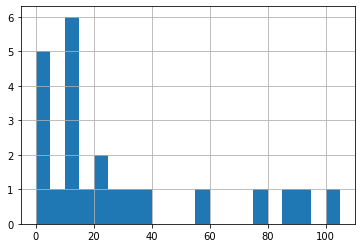

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
tabla['caps'].astype(int).hist(bins=range(0,110,5))

Születési időből kor kiszámítása (visszadátumozva)

In [16]:
from datetime import datetime
def toage(birthstring):
    born = datetime.strptime(birthstring, '%d/%m/%Y')
    start = datetime(2016, 6, 10)
    age = start.year - born.year - ((start.month, start.day) < (born.month, born.day))
    return(age)

Ez tényleg a jó kort adja vissza? Miért működik ez így:

    age = start.year - born.year - ((start.month, start.day) < (born.month, born.day))

Kiegészítjük a táblát egy új oszloppal (kor) az előbb megírt függvényt használva.

In [17]:
tabla['age'] = tabla.apply(lambda x: toage(x['date of birth']), axis=1)

axis: 0 or ‘index’: apply function to each column.
1 or ‘columns’: apply function to each row.

In [18]:
tabla

,name,caps,goals for country,date of birth,club,age
0,Gábor Király,102,0,01/04/1976,Haladás,40
1,Dénes Dibusz,4,0,16/11/1990,Ferencváros,25
2,Péter Gulácsi,3,0,06/05/1990,Red Bull Leipzig,26
3,Barnabás Bese,0,0,06/05/1994,MTK,22
4,Attila Fiola,14,0,17/02/1990,Puskás Academy,26
5,Richárd Guzmics,13,1,16/04/1987,Wisla Krakow,29
6,Tamás Kádár,29,0,14/03/1990,Lech Poznan,26
7,Mihály Korhut,4,0,01/12/1988,Debreceni VSC,27
8,Roland Juhász,91,6,01/07/1983,Videoton,32
9,Ádám Lang,10,0,17/01/1993,Videoton,23


A tábla kiegészítése egy új oszloppal másként

In [19]:
tabla = tabla.assign(goal_per_caps = lambda x: (x['goals for country'].astype(int))/(x['caps'].astype(int)) )

In [20]:
tabla

,name,caps,goals for country,date of birth,club,age,goal_per_caps
0,Gábor Király,102,0,01/04/1976,Haladás,40,0.000000
1,Dénes Dibusz,4,0,16/11/1990,Ferencváros,25,0.000000
2,Péter Gulácsi,3,0,06/05/1990,Red Bull Leipzig,26,0.000000
3,Barnabás Bese,0,0,06/05/1994,MTK,22,NaN
4,Attila Fiola,14,0,17/02/1990,Puskás Academy,26,0.000000
5,Richárd Guzmics,13,1,16/04/1987,Wisla Krakow,29,0.076923
6,Tamás Kádár,29,0,14/03/1990,Lech Poznan,26,0.000000
7,Mihály Korhut,4,0,01/12/1988,Debreceni VSC,27,0.000000
8,Roland Juhász,91,6,01/07/1983,Videoton,32,0.065934
9,Ádám Lang,10,0,17/01/1993,Videoton,23,0.000000


### Osztályozás

#### Adatok beolvasása

In [21]:
import pandas as pd
bank_data = pd.read_csv("../Adatok/bank.csv", delimiter = " ", names = ['age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'])

Ezzel az adathalmazzal már volt dolgunk, az attribútumok:

* age: age of customer in years (numeric)
* sex: MALE / FEMALE
* region: inner_city/rural/suburban/town
* income: income of customer (numeric)
* married: is the customer married (YES/NO)
* children: number of children (numeric)
* car: does the customer own a car (YES/NO)
* save_acct: does the customer have a saving account (YES/NO)
* current_acct: does the customer have a current account (YES/NO)
* mortgage: does the customer have a mortgage (YES/NO)
* **pep: did the customer buy a PEP (Personal Equity Plan) after the last mailing (YES/NO)**

In [22]:
bank_data.head()

,age,sex,region,income,married,children,car,save_acct,current_acct,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [23]:
bank_data.shape

(600, 11)

In [24]:
numeric_data = bank_data.replace(['NO', 'YES', 'MALE', 'FEMALE'],[0,1,0,1])
numeric_data.head()

,age,sex,region,income,married,children,car,save_acct,current_acct,mortgage,pep
0,48,1,INNER_CITY,17546.0,0,1,0,0,0,0,1
1,40,0,TOWN,30085.1,1,3,1,0,1,1,0
2,51,1,INNER_CITY,16575.4,1,0,1,1,1,0,0
3,23,1,TOWN,20375.4,1,3,0,0,1,0,0
4,57,1,RURAL,50576.3,1,0,0,1,0,0,0


Átalakítás numpy array formátumra

In [25]:
import numpy as np
numeric_data = numeric_data.values

In [26]:
numeric_data[0:5]

array([[48, 1, 'INNER_CITY', 17546.0, 0, 1, 0, 0, 0, 0, 1],
       [40, 0, 'TOWN', 30085.1, 1, 3, 1, 0, 1, 1, 0],
       [51, 1, 'INNER_CITY', 16575.4, 1, 0, 1, 1, 1, 0, 0],
       [23, 1, 'TOWN', 20375.4, 1, 3, 0, 0, 1, 0, 0],
       [57, 1, 'RURAL', 50576.3, 1, 0, 0, 1, 0, 0, 0]], dtype=object)

Lakhely (kategorikus változó) átkódolása binárissá

In [27]:
features = np.zeros((len(numeric_data),4))
numeric_data = np.append(numeric_data,features,1)
j = 2
for i in range(len(numeric_data)):
    if numeric_data[i][j] == 'INNER_CITY':
        numeric_data[i][11:15] = [1,0,0,0]
    if numeric_data[i][j] == 'TOWN':
         numeric_data[i][11:15] = [0,1,0,0]
    if numeric_data[i][j] == 'RURAL':
         numeric_data[i][11:15] = [0,0,1,0]
    if numeric_data[i][j] == 'SUBURBAN':
         numeric_data[i][11:15] = [0,0,0,1]        
#remove redundant column
numeric_data = np.delete(numeric_data, 2, 1)

In [28]:
numeric_data[0:5]

array([[48, 1, 17546.0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [40, 0, 30085.1, 1, 3, 1, 0, 1, 1, 0, 0, 1, 0, 0],
       [51, 1, 16575.4, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0],
       [23, 1, 20375.4, 1, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [57, 1, 50576.3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]], dtype=object)

In [29]:
numeric_data.astype(float)

array([[4.80000e+01, 1.00000e+00, 1.75460e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.00000e+01, 0.00000e+00, 3.00851e+04, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.10000e+01, 1.00000e+00, 1.65754e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.10000e+01, 1.00000e+00, 1.59763e+04, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.90000e+01, 0.00000e+00, 1.47118e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.80000e+01, 0.00000e+00, 2.66716e+04, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [30]:
numeric_data.shape

(600, 14)

#### Néhány gondolat a Scikit-learnről általánosságban

In [31]:
from IPython.core.display import Image, display
from IPython.core.display import HTML
HTML('<iframe src=http://scikit-learn.org/stable/ width=1000 height=400></iframe>')

C:\Users\molon\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Scikit-learn puskalap

In [32]:
HTML('<iframe src=https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf width=1000 height=400></iframe>')

Gép tanulás fázisai sci-kit learnnel

1. Mi a modell?
```python
clf = LogisticRegression()
```

2. Tanítsuk a modellt!
```python
clf.fit(X_train, y_train)
```

3. Jósoljunk a modellel!
```python
clf.predict(X_test)
```

**Készítsük elő a címkeváltozót, és a többi attribútumot!**

Célunk a pep érték jóslása (column idx = 10)

In [33]:
bank_labels = numeric_data[:, 10].astype(int)

In [34]:
bank_attrs  = np.delete(numeric_data, 10, 1)

In [35]:
bank_attrs.shape

(600, 13)

Ezekre szükségünk lesz:

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Tanító és tesztadadatok kettébontása**

In [37]:
bank_features_train, bank_features_test, bank_labels_train, bank_labels_test = train_test_split(bank_attrs, bank_labels, test_size=0.33, random_state=42)

**"Tanítás" (kNN)** 

In [38]:
neigh = KNeighborsClassifier(n_neighbors=11,metric="euclidean")
neigh.fit(bank_features_train,bank_labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

**Predikció**

In [39]:
predictions_test = neigh.predict(bank_features_test)

In [40]:
predictions_test[0:10]

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

**Kiértékelés**

In [41]:
cm = metrics.confusion_matrix(bank_labels_test,predictions_test)
print(cm)

[[76 25]
 [69 28]]


**Precision, Recall, Accuaracy**

In [42]:
print("Precision: ", metrics.precision_score(bank_labels_test,predictions_test))
print("Recall: ", metrics.recall_score(bank_labels_test,predictions_test))
print("Accuracy: ", metrics.accuracy_score(bank_labels_test,predictions_test))

Precision:  0.5283018867924528
Recall:  0.28865979381443296
Accuracy:  0.5252525252525253


**ROC, AUC kis példán**

In [43]:
y_true = [1,0,1,0,0,0,1,0,1,1]
y_score = [0.25,0.43,0.53,0.76,0.85,0.85,0.85,0.87,0.93,0.95]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label=1, sample_weight=None)

(0, 1)

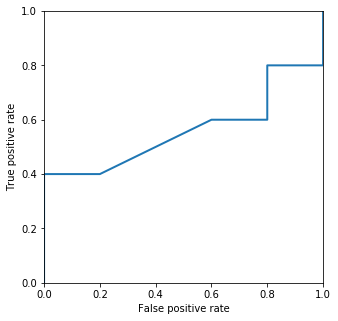

In [44]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

In [45]:
metrics.roc_auc_score(y_true, y_score)

0.56

**ROC és AUC a Bank adatokon**

Először kellenek a pontértékek!

In [46]:
knn_prob = neigh.predict_proba(bank_features_test)
knn_prob[0:5]

array([[0.54545455, 0.45454545],
       [0.63636364, 0.36363636],
       [0.72727273, 0.27272727],
       [0.54545455, 0.45454545],
       [0.45454545, 0.54545455]])

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(bank_labels_test, knn_prob[:,1], pos_label=1, sample_weight=None)

(0, 1)

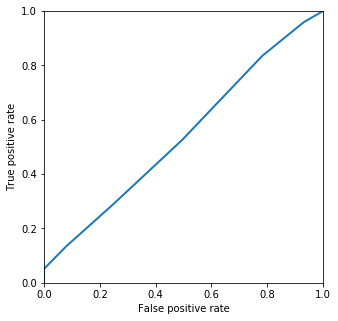

In [48]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

In [49]:
metrics.roc_auc_score(bank_labels_test,knn_prob[:,1], average='macro', sample_weight=None)

0.5401653567418597

Hát, nem túl jó... :(

Próbáljuk ki döntési fával, hátha jobb eredményeket kapunk! ==> **HF2/2**